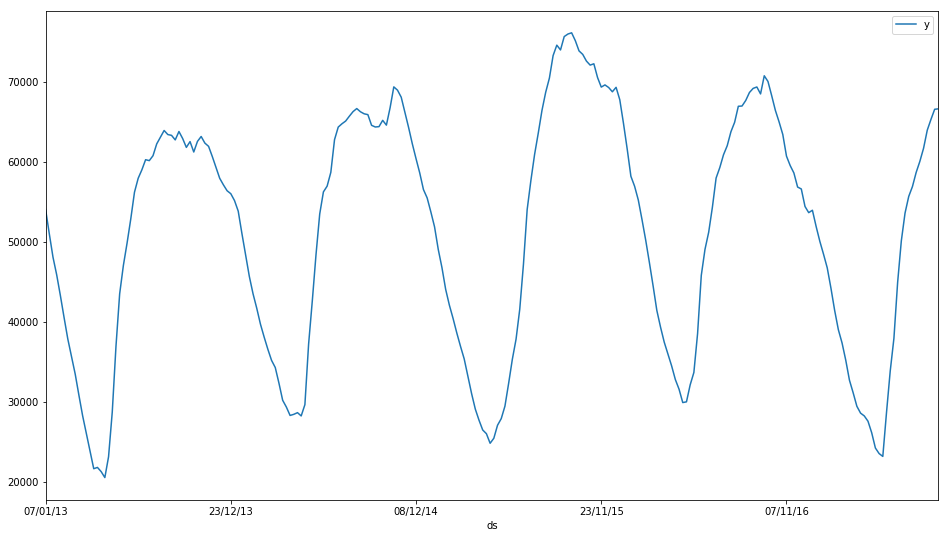

In [21]:
%matplotlib inline 
import pandas as pd
import numpy as np
from fbprophet import Prophet

# Read dataset from csv
df = pd.read_csv('../datasets/nordic_hydro_reservoir_nordpool.csv')#, parse_dates=['Date'])

# Select desired data and format into format Prophet expects
area = 'NO'
df = df[['Date',area]]
df = df.rename(columns={'Date': 'ds', area: 'y'})

df.set_index('ds').plot(figsize=(16,9))

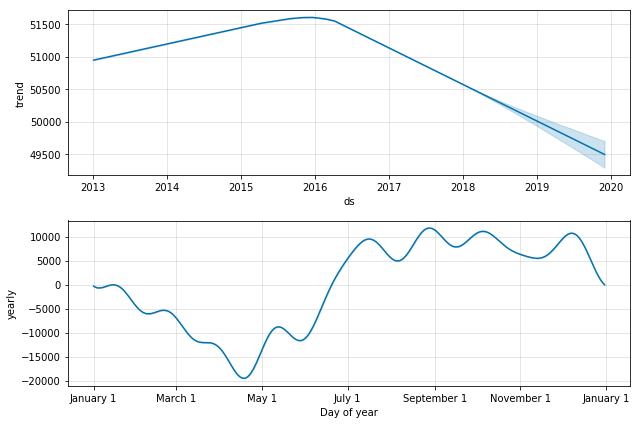

In [18]:
# Initialise prophet and input data
m = Prophet(yearly_seasonality=True, weekly_seasonality=False)
m.fit(df)
#m.params

# Specify timeinterval to forecast (2 years)
future_data = m.make_future_dataframe(periods=104, freq='W')
forecast = m.predict(future_data)

m.plot_components(forecast);

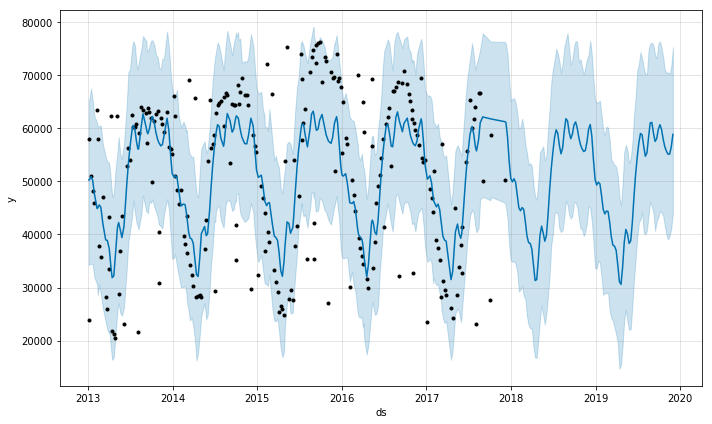

In [19]:
m.plot(forecast);